## DATA PREPROCESSING STEP 02

### 1) Load the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [3]:
data = pd.read_excel("../dataset/dim_reduct_v1.xlsx")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


### 2) Calculate the variables distances using Linear Pearson Correlation

In [4]:
# Compute correlation matrix
corr_matrix = data.corr().values

# Convert correlation to distance: distance = 1 - |correlation|
distance_matrix = 1 - np.abs(corr_matrix)

# Make sure it's a valid condensed distance matrix
distance_matrix = np.nan_to_num(distance_matrix)  # Handle NaN if any

In [5]:
distance_matrix

array([[0.        , 0.44176229, 0.78444396, ..., 0.99689007, 0.96375043,
        0.93811592],
       [0.44176229, 0.        , 0.91347969, ..., 0.8709086 , 0.81326087,
        0.8788283 ],
       [0.78444396, 0.91347969, 0.        , ..., 0.8319527 , 0.78699514,
        0.8820569 ],
       ...,
       [0.99689007, 0.8709086 , 0.8319527 , ..., 0.        , 0.74351926,
        0.62775743],
       [0.96375043, 0.81326087, 0.78699514, ..., 0.74351926, 0.        ,
        0.71739251],
       [0.93811592, 0.8788283 , 0.8820569 , ..., 0.62775743, 0.71739251,
        0.        ]])

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr_matrix(data, corr_matrix):
    variables = data.columns
    plt.figure(figsize=(24, 20))

    # Create heatmap with annotations
    ax = sns.heatmap(
        corr_matrix,
        annot=True,            # Show values in cells
        fmt=".1f",             # 2 decimal places
        cmap="coolwarm",       # Blue-white-red color scheme
        vmin=0, vmax=1,        # Fix color range between 0-1
        square=True,           # Square cells
        linewidths=0.1,         # Add grid lines
        cbar_kws={"shrink": 0.5, "label": "Correlation"}, # Color bar size
        xticklabels=variables,
        yticklabels=variables,        
    )

    # Adjust tick labels for readability
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        ha='center',
        fontsize=8  # Smaller font
    )

    ax.set_yticklabels(
        ax.get_yticklabels(),
        fontsize=8
    )

    # Improve readability
    plt.title("Distance Correlation Matrix", fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig("corr_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
     


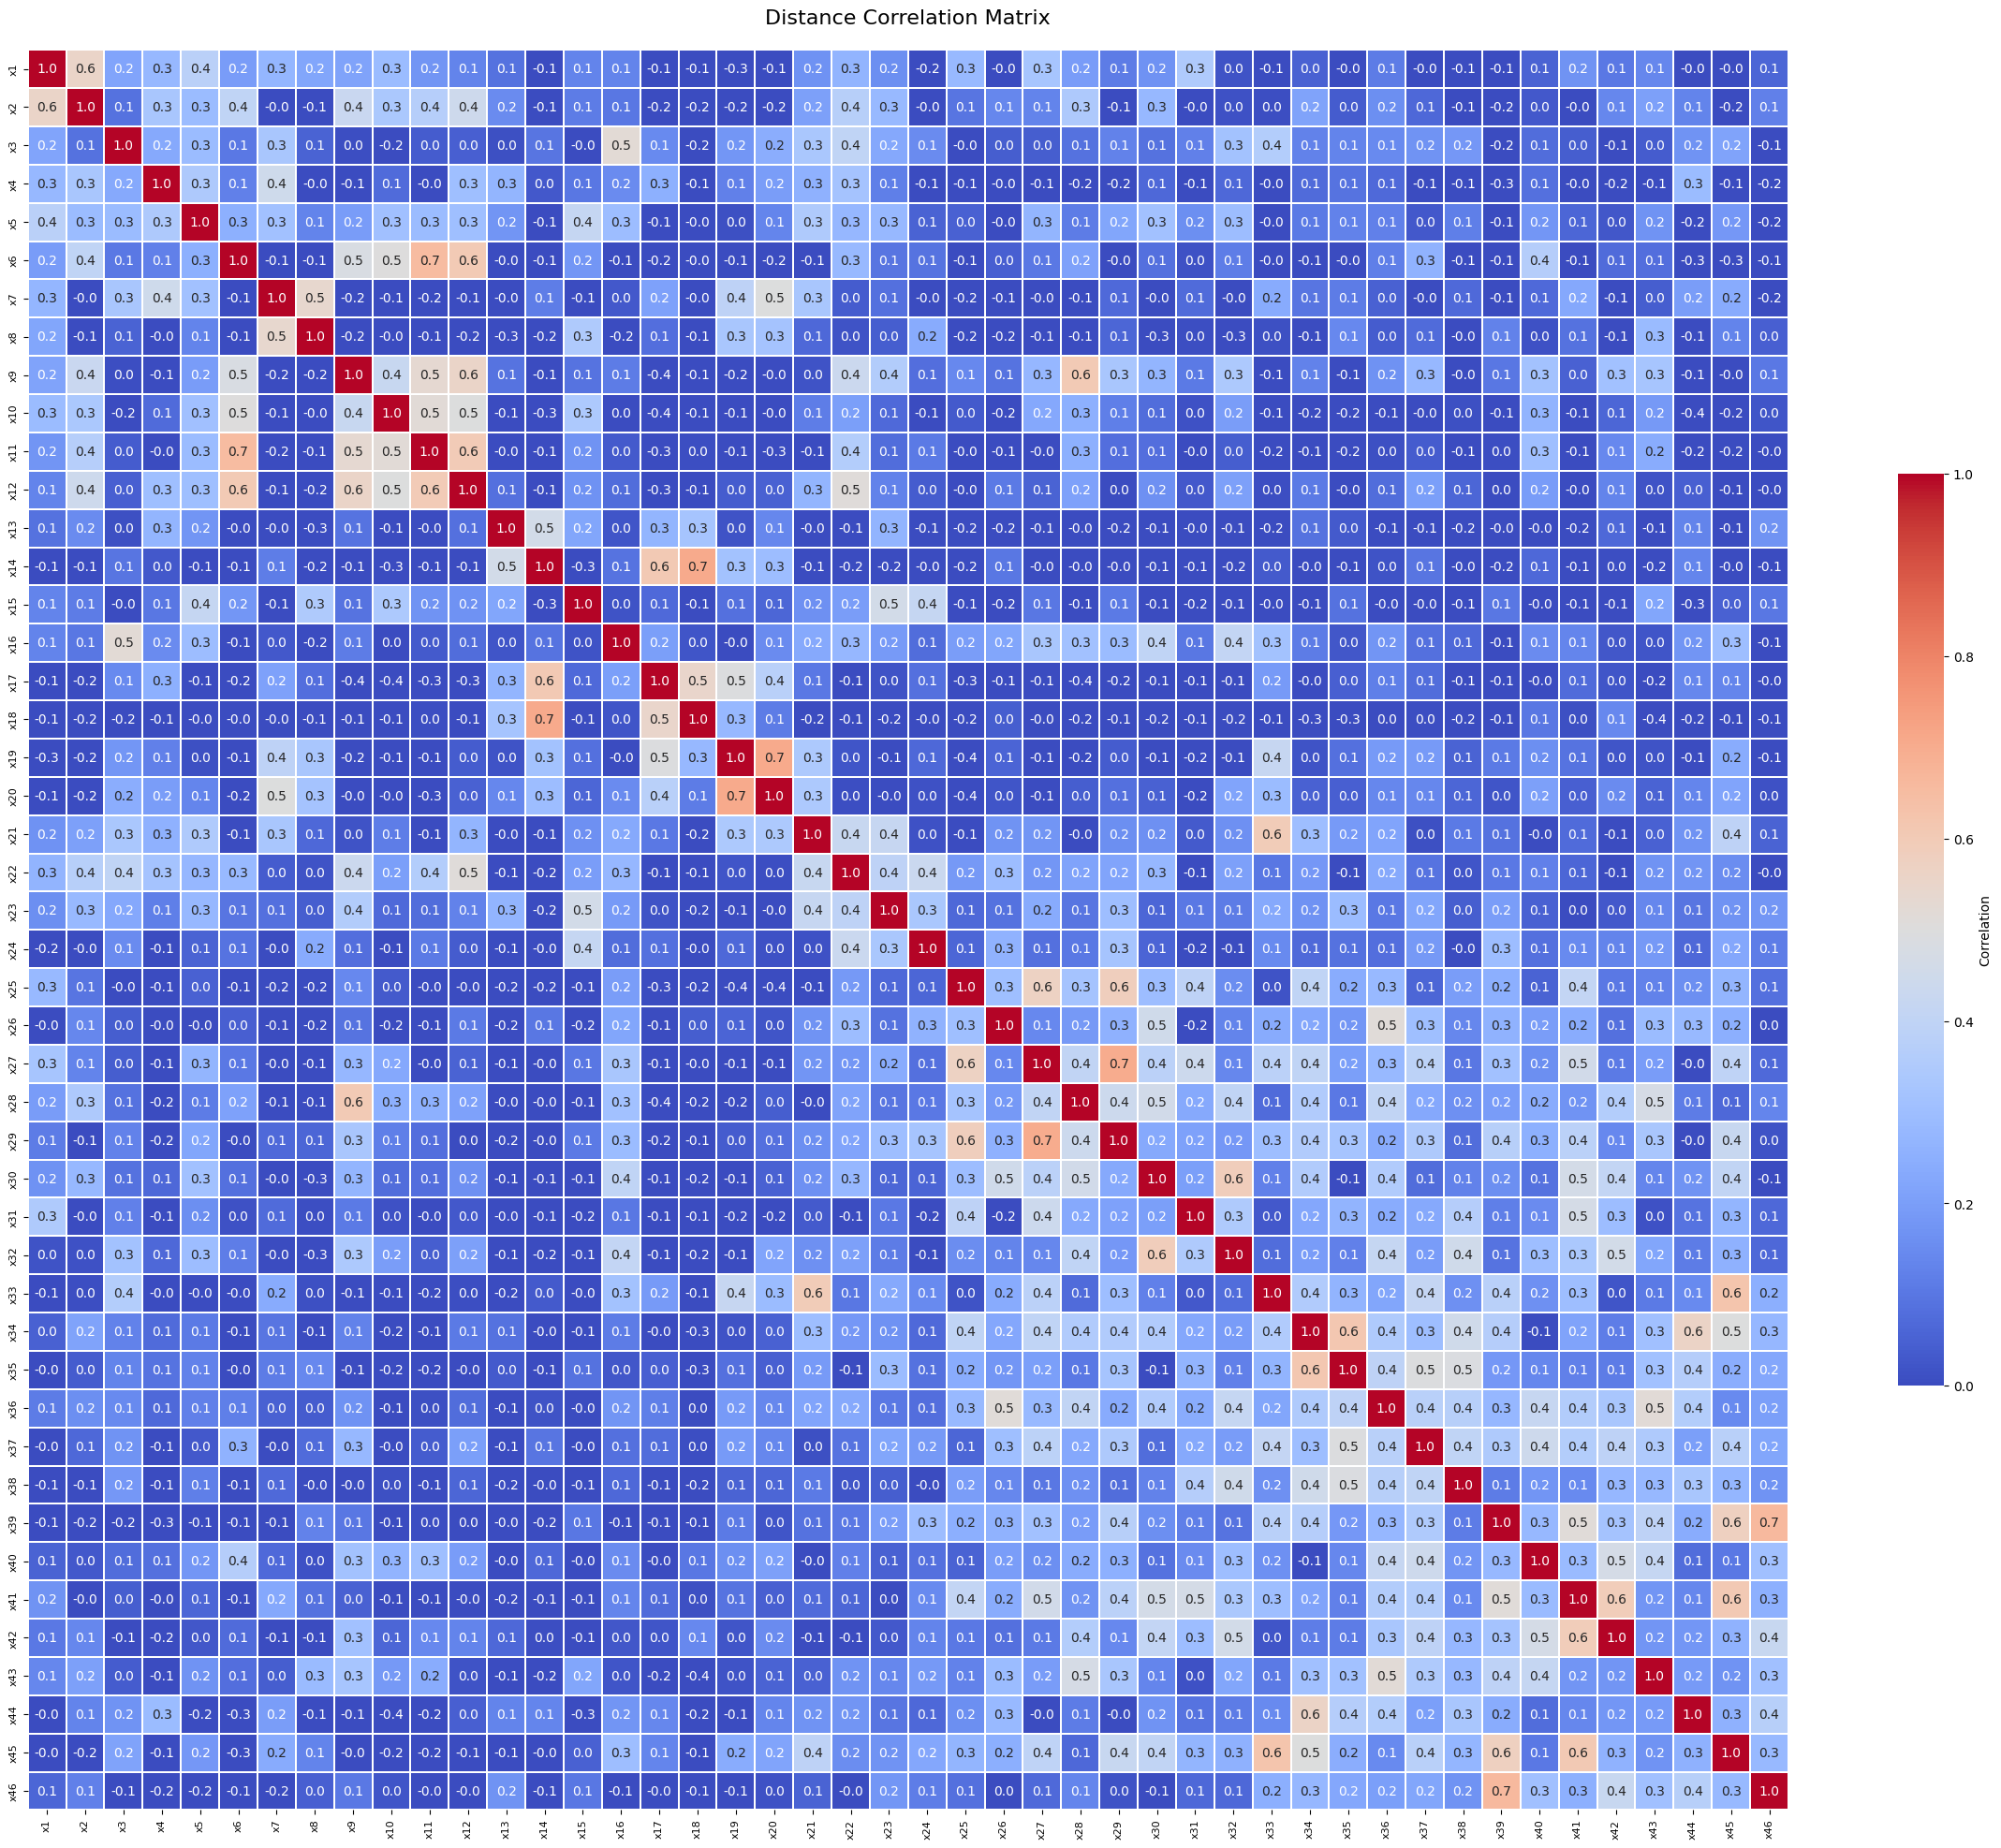

In [10]:
plot_corr_matrix(data, corr_matrix)

### 3) Hierarchical Clustering Visualization: Dendogram

In [6]:
# Perform hierarchical clustering
Z = linkage(squareform(distance_matrix), method='average')  # 'average', 'complete', 'ward'

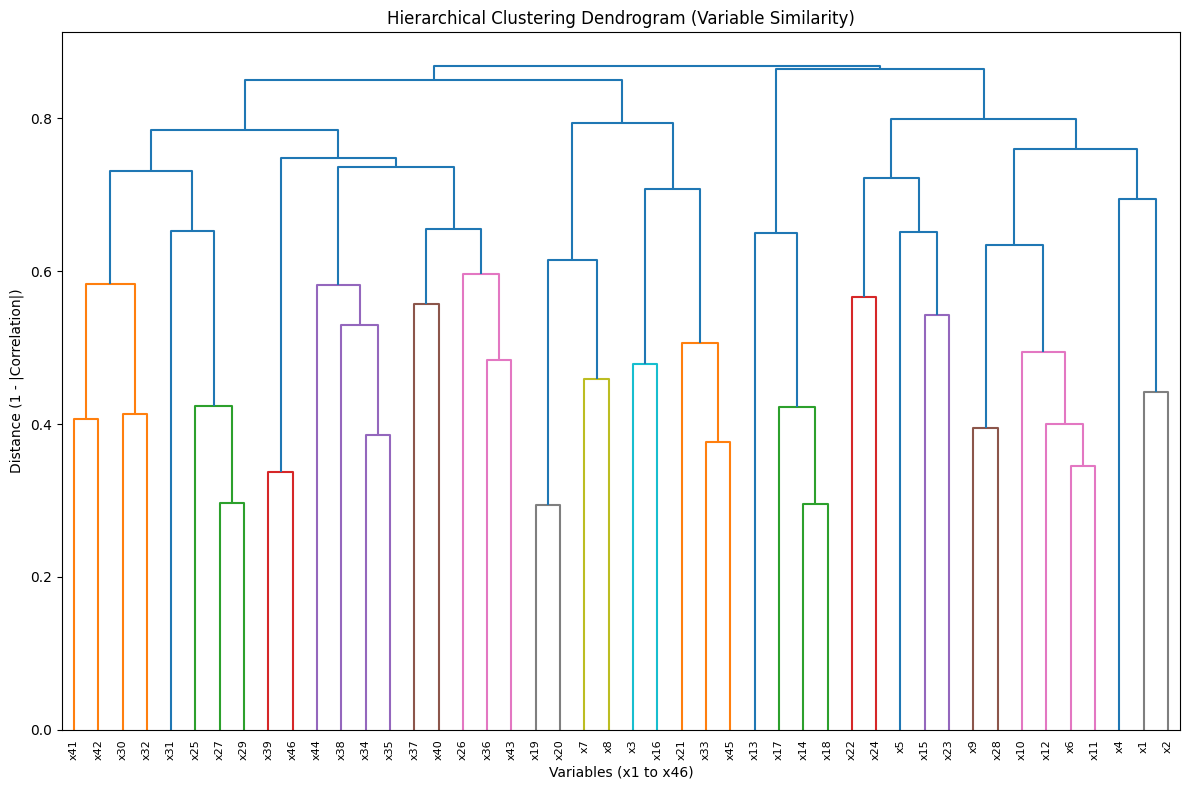

In [7]:
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Variable Similarity)")
plt.xlabel("Variables (x1 to x46)")
plt.ylabel("Distance (1 - |Correlation|)")
plt.tight_layout()
plt.show()

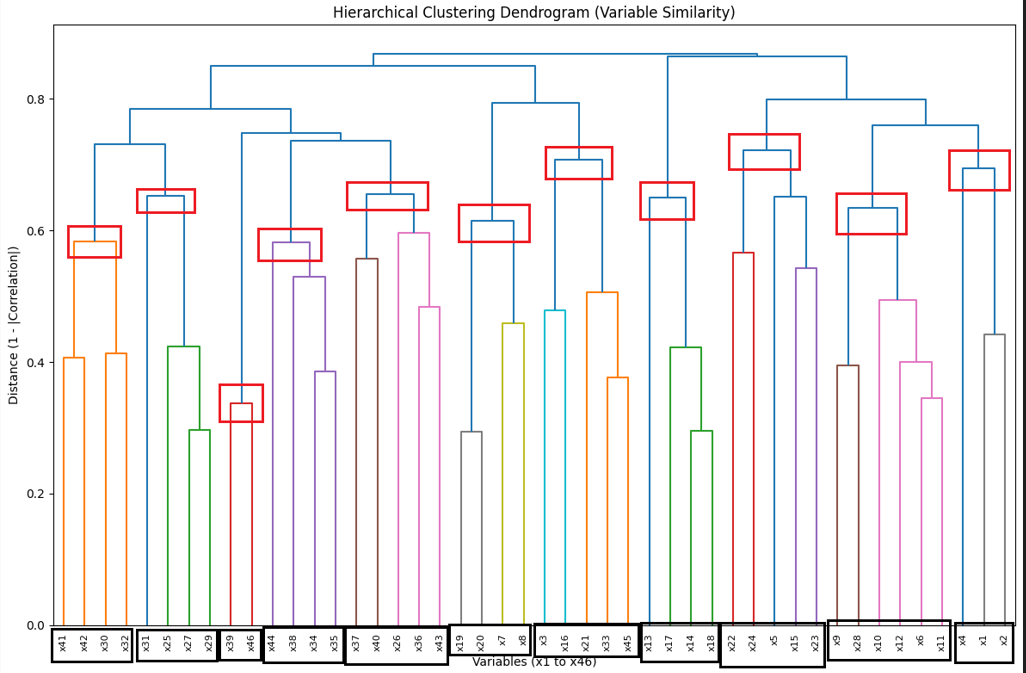

### 4) Dimensionality Reduction through AutoEncoders

In [62]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


In [63]:
data.shape

(40, 46)

### Autoencoder model

In [103]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU

In [ ]:
def autoencoder_compressor(data, input_dim, output_dim):
    # Architecture with intermediate layer and LeakyReLU
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(2)(input_layer)  # Intermediate layer
    encoded = LeakyReLU(negative_slope=0.1)(encoded)  # Avoid dead neurons
    encoded = Dense(output_dim, activation='linear')(encoded)  # Final bottleneck
    
    # Decoder
    decoded = Dense(input_dim, activation='linear')(encoded)
    
    # Model
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(data, data, epochs=10, batch_size=5, verbose=0)  # Increased epochs
    
    # Encoder (for dimensionality reduction)
    encoder = Model(input_layer, encoded)
    result = encoder.predict(data)
    return result

#### Dimensionality reduction using hierarchical clusters

In [113]:
data_compressed = []

In [114]:
subgroups = {
    "group01": ["x41", "x42", "x30", "x32"],
    "group02": ["x31", "x25", "x27", "x29"],
    "group03": ["x39", "x46"],
    "group04": ["x44", "x38", "x34", "x35"],
    "group05": ["x37","x40", "x26", "x36", "x43"],
    "group06": ["x19", "x20", "x7", "x8"],
    "group07": ["x3", "x16", "x21", "x33", "x45"],
    "group08": ["x13", "x17", "x14", "x18"],
    "group09": ["x22", "x24","x5", "x15", "x23"],
    "group10": ["x9", "x28", "x10", "x12", "x6", "x11"],
    "group11": ["x4", "x1", "x2"]
}

In [115]:
subgroups.items()

dict_items([('group01', ['x41', 'x42', 'x30', 'x32']), ('group02', ['x31', 'x25', 'x27', 'x29']), ('group03', ['x39', 'x46']), ('group04', ['x44', 'x38', 'x34', 'x35']), ('group05', ['x37', 'x40', 'x26', 'x36', 'x43']), ('group06', ['x19', 'x20', 'x7', 'x8']), ('group07', ['x3', 'x16', 'x21', 'x33', 'x45']), ('group08', ['x13', 'x17', 'x14', 'x18']), ('group09', ['x22', 'x24', 'x5', 'x15', 'x23']), ('group10', ['x9', 'x28', 'x10', 'x12', 'x6', 'x11']), ('group11', ['x4', 'x1', 'x2'])])

In [116]:
data[subgroups["group01"]].head()

,x41,x42,x30,x32
0,-3.574463,-3.972343,-5.075038,-7.999031
1,-7.573024,-7.974543,-1.072523,-9.998484
2,2.426235,-5.974534,-7.074185,0.000340
3,-7.574656,6.024878,-11.074297,2.000313
4,-7.573840,-1.974245,8.926775,0.000652


In [117]:
data[subgroups["group01"]].shape

(40, 4)

In [118]:
def compression_data(data, subgroups):
    data_compressed = np.empty((data.shape[0], 0))  
    for key, val in subgroups.items():
        aux = []        
        aux = autoencoder_compressor(data = data[val], input_dim = len(val), output_dim = 1)
        aux = np.array(aux).reshape(-1, 1)        
        data_compressed = np.hstack([data_compressed, aux])
        print("The " + key + " compression is done ...")
    return data_compressed

In [119]:
final_table = compression_data(data, subgroups)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The group01 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
The group02 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
The group03 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The group04 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
The group05 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
The group06 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
The group07 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The group08 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The group09 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
The group10 compression is done ...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
The group11 compression is done ...


In [120]:
final_table

array([[-1.24217011e-01,  1.91959441e-01,  1.47931659e+00,
         7.59879065e+00, -1.96272343e-01,  2.25299501e+00,
         5.74844301e-01, -1.43655844e+01, -8.31802666e-01,
        -1.29455352e+00,  6.70107651e+00],
       [-4.78797220e-02,  2.10094118e+00,  1.69156516e+00,
         4.81534079e-02,  1.06465769e+00, -2.14004016e+00,
         2.69398403e+00, -1.59328976e+01,  4.62201566e-01,
         1.96637878e+01,  6.23486280e+00],
       [-1.00621796e+00, -6.44586086e-01,  1.61195862e+00,
        -4.25095701e+00,  3.53330791e-01, -1.49556184e+00,
        -1.40432453e+00,  1.85087979e+00, -1.90050375e+00,
        -1.50973260e+00, -1.45985174e+01],
       [-4.39011514e-01, -3.74805713e+00,  1.14748132e+00,
        -7.02073097e-01, -4.26319695e+00,  3.30244350e+00,
        -2.86941624e+00, -2.27783794e+01,  6.60776198e-01,
         7.72006989e+00,  1.02823219e+01],
       [ 7.85455346e-01,  1.35585654e+00,  2.38137722e+00,
         3.45764804e+00,  1.73536706e+00,  9.09480762e+00,
  

In [129]:
# convert to pandas dataframe
frame_dataset = pd.DataFrame(final_table)

In [130]:
frame_dataset.columns = ["x1*", "x2*", "x3*", "x4*", "x5*", 
                         "x6*", "x7*", "x8*", "x9*", "x10*", "x11*"]

In [131]:
frame_dataset.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-0.124217,0.191959,1.479317,7.598791,-0.196272,2.252995,0.574844,-14.365584,-0.831803,-1.294554,6.701077
1,-0.047880,2.100941,1.691565,0.048153,1.064658,-2.140040,2.693984,-15.932898,0.462202,19.663788,6.234863
2,-1.006218,-0.644586,1.611959,-4.250957,0.353331,-1.495562,-1.404325,1.850880,-1.900504,-1.509733,-14.598517
3,-0.439012,-3.748057,1.147481,-0.702073,-4.263197,3.302444,-2.869416,-22.778379,0.660776,7.720070,10.282322
4,0.785455,1.355857,2.381377,3.457648,1.735367,9.094808,2.773776,-22.135305,-1.914031,-1.160654,5.341554


In [132]:
print("Final dimensionality: ", frame_dataset.shape)

Final dimensionality:  (40, 11)
